# Visualize GCOM-C products

The `gportal` package also provides utilities for handling product files.

This example demonstrates the visualization of GCOM-C products.

The file utility dependencies are included as extras. Please install the `gcomc` extra.

```console
$ pip install gportal[gcomc]
```

In [1]:
import gportal
from gportal.file import GCOMCFile

import matplotlib.pyplot as plt
import rioxarray
import cartopy.crs as ccrs

In [2]:
%config InlineBackend.figure_formats = ['retina']

In [3]:
import getpass

gportal.username = "sankichi92"
gportal.password = getpass.getpass()

## Level 3 Sea Surface Temperature

Download an L3 SST product.

In [4]:
granule_id = "GC1SG1_20230101D01M_D0000_3MSG_SST_F_3000"
downloaded_path = gportal.download(
    f"standard/GCOM-C/GCOM-C.SGLI/L3.OCEAN.SST_/3/2023/01/{granule_id}.h5",
    local_dir="./downloads",
)
downloaded_path

'./downloads/GC1SG1_20230101D01M_D0000_3MSG_SST_F_3000.h5'

Convert HDF5 to GeoTIFF.

In [5]:
converted_paths = GCOMCFile.convert_to_geotiff(downloaded_path, output_dir="./downloads")
converted_paths

['downloads/GC1SG1_20230101D01M_D0000_3MSG_SST_F_3000-SST_AVE.tif',
 'downloads/GC1SG1_20230101D01M_D0000_3MSG_SST_F_3000-SST_QA_flag.tif']

Open with [`rioxarray`](https://corteva.github.io/rioxarray/).

In [6]:
l3_sst = rioxarray.open_rasterio(converted_paths[0], mask_and_scale=True)
l3_sst

<xarray.DataArray (band: 1, y: 4320, x: 8640)>
[37324800 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * y            (y) float64 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area

Plot it.

Text(0.5, 1.0, 'GC1SG1_20230101D01M_D0000_3MSG_SST_F_3000')

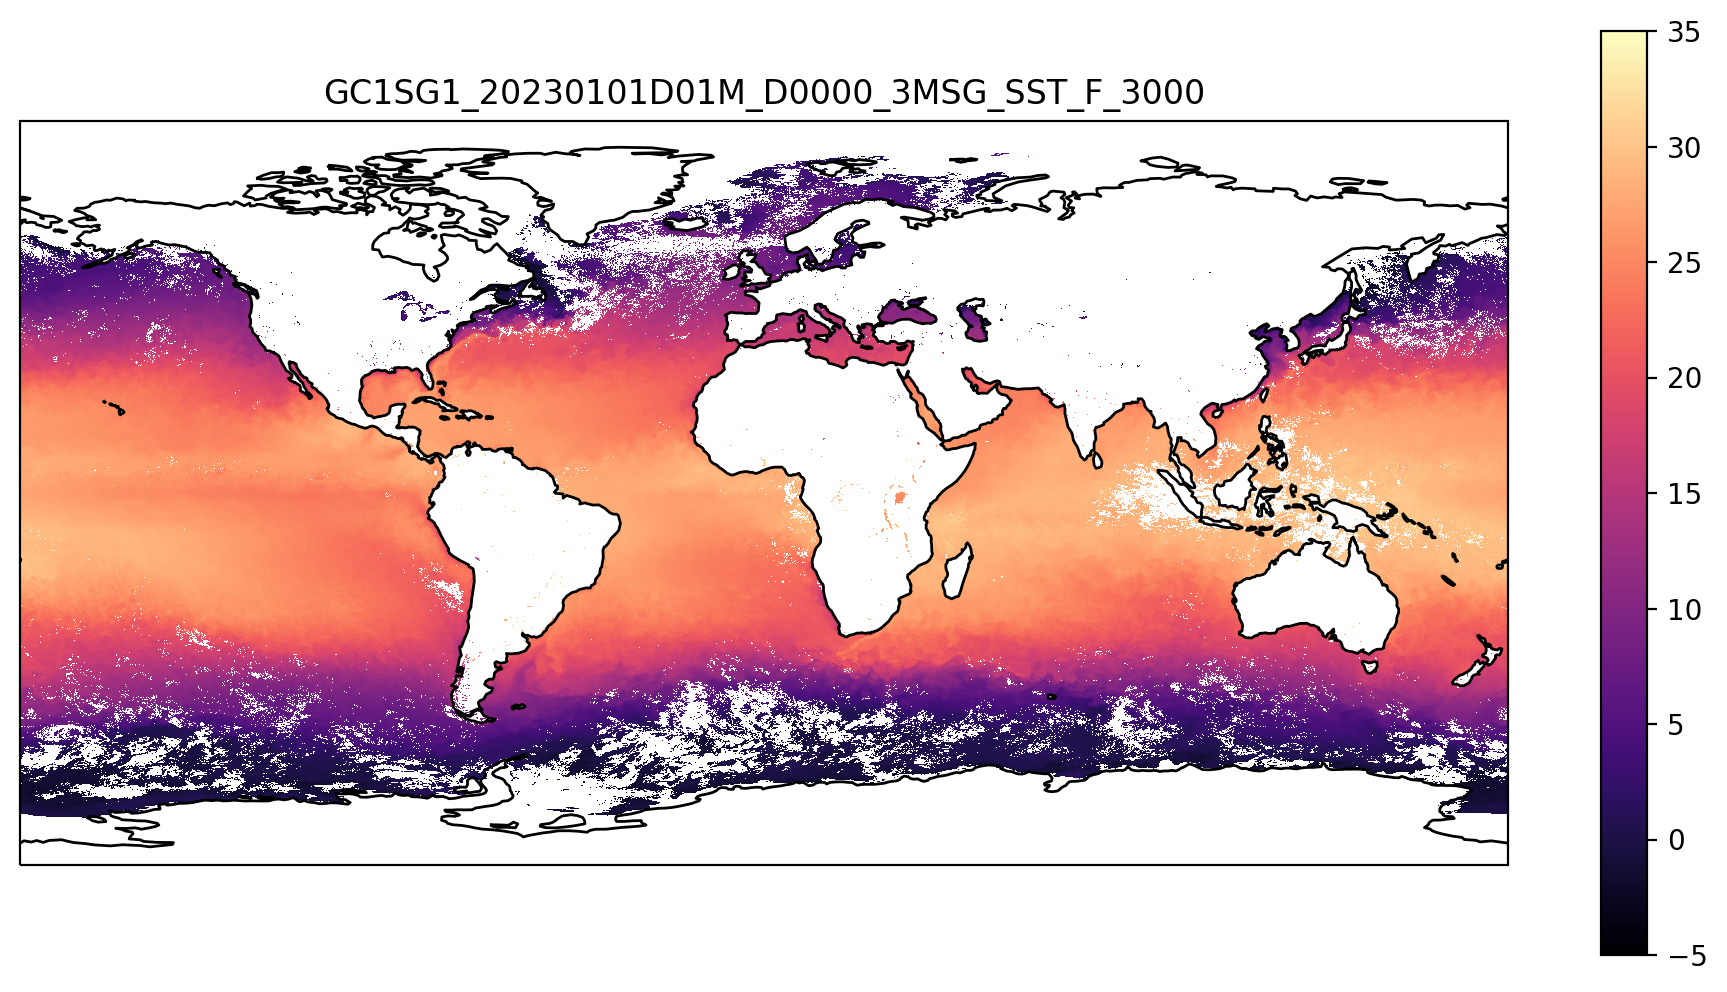

In [7]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})

l3_sst.plot(ax=ax, vmin=-5, vmax=35, cmap="magma")
ax.coastlines()
ax.set_title(granule_id)